In [1]:
import pandas as pd
import pickle
import random

import numpy as np
import torch
#import ninja
from backend.disentangle_concepts import *
import dnnlib 
import legacy

%load_ext autoreload
%autoreload 2

annotations_file = './data/annotated_files/seeds0000-100000.pkl'
with open(annotations_file, 'rb') as f:
    annotations = pickle.load(f)

ann_df = pd.read_csv('./data/annotated_files/sim_seeds0000-100000.csv')
concepts = './data/concepts.txt'

with open(concepts) as f:
    labels = [line.strip() for line in f.readlines()]

with dnnlib.util.open_url('./data/model_files/network-snapshot-010600.pkl') as f:
    model = legacy.load_network_pkl(f)['G_ema'].to('cpu') # type: ignore
concept_id = 'Abstract'
separation_vector, number_important_features, important_nodes = get_separation_space(concept_id, annotations, ann_df, method='LR', samples=150, C=0.1)

/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ludovicaschaerf/anaconda3/envs/ar

Val performance logistic regression 0.85


In [5]:
print(number_important_features, important_nodes)

26 [ 21  60 144 145 148 150 165 180 181 223 228 255 262 265 276 292 335 336
 343 359 370 401 404 475 482 495]


In [4]:
seed = random.randint(0,10000)
original_image_vec = annotations['z_vectors'][seed]
img = generate_original_image(original_image_vec, model)

images, lambdas = regenerate_images(model, original_image_vec, separation_vector, min_epsilon=-(int(2)), max_epsilon=int(2))

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


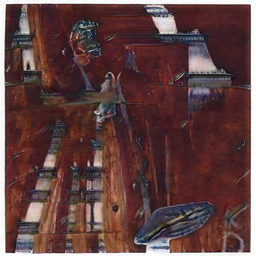

In [5]:
img

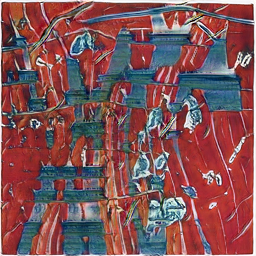

In [6]:
images[0]

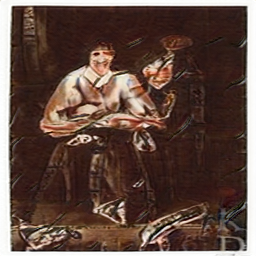

In [7]:
images[-1]

In [8]:
with open(annotations_file, 'rb') as f:
        annotations = pickle.load(f)
annotations['fname'][:10], annotations['z_vectors'][:1],# annotations['annotations'][:5]

(['/home/ludosc/data/stylegan-156000-captures/seed0000.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0001.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0002.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0003.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0004.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0005.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0006.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0007.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0008.png',
  '/home/ludosc/data/stylegan-156000-captures/seed0009.png'],
 [array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
          -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
           0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
           0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
          -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
          -1.4

In [9]:
seed = random.randint(0,10000)
original_image_vec = annotations['z_vectors'][seed]
img = generate_original_image(original_image_vec, model)

In [10]:
concept_id = "Readymade"

Performance                 0.001932
Woodcut                     0.001960
Rural scene                 0.002205
Contemporary                0.003004
Individual                  0.003129
Oriental Eastern art        0.003205
Landscapes                  0.003367
Drawing                     0.004171
Lithography                 0.006614
Etching                     0.011107
People                      0.011938
Rocaille                    0.012255
Rococo                      0.014263
Renaissance                 0.018160
Representational            0.024860
Baroque                     0.027464
Ancient                     0.054892
Portrait                    0.087744
Regionalism                 0.683358
Unnamed: 0              10563.000000
Name: 10563, dtype: float64


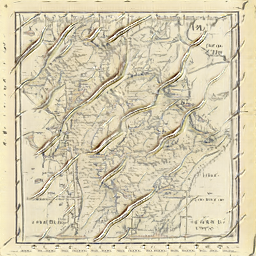

In [11]:
samples = 500 
abstracts = np.array([float(ann) for ann in ann_df[concept_id]])

repr_idxs = list(np.argsort(abstracts))[:samples]
abstract_idxs = list(np.argsort(abstracts))[-samples:]
    
z = annotations['z_vectors'][abstract_idxs[0]]
img = generate_original_image(z, model)
if 'ID' in ann_df.columns:
    ann_df = ann_df.drop('ID', axis=1)
print(ann_df.loc[abstract_idxs[0], :].sort_values()[-20:])
img

In [12]:
ann_df['Abstract'].value_counts()

2.700000e-08    10
2.400000e-08     9
5.500000e-08     9
3.600000e-08     9
1.700000e-08     9
                ..
2.006789e-03     1
1.055200e-05     1
3.565400e-05     1
3.154000e-06     1
3.812580e-04     1
Name: Abstract, Length: 13018, dtype: int64

Land Art           0.000000
Art Deco           0.000000
Art Nouveau        0.000000
Kinetic Art        0.000000
Warm palette       0.000000
                   ...     
Intaglio           0.000186
Lithography        0.000251
Etching            0.000369
Portrait           0.999049
Unnamed: 0      5064.000000
Name: 5064, Length: 133, dtype: float64


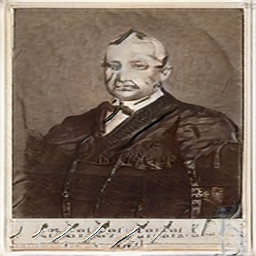

In [13]:
z = annotations['z_vectors'][repr_idxs[0]]
img = generate_original_image(z, model)
print(ann_df.loc[repr_idxs[0], :].sort_values())
img

In [14]:
for col in ann_df.columns:
    if '1' in col:
        print(col)

In [15]:
concepts = ['Op Art', 'Minimalism', 'Surrealism', 'Baroque', 'Lithography', 'Woodcut', 'Etching', 'Intaglio',]

vectors, nodes_in_common = get_concepts_vectors(concepts, annotations, ann_df, method='LR', samples=150, C=0.1)

Val performance logistic regression 0.8166666666666667
Val performance logistic regression 0.8333333333333334
Val performance logistic regression 0.6833333333333333
Val performance logistic regression 0.6333333333333333
Val performance logistic regression 0.9
Val performance logistic regression 0.7333333333333333
Val performance logistic regression 0.7166666666666667
Val performance logistic regression 0.6333333333333333


In [20]:
print(nodes_in_common)

set()


In [76]:
# import plotly.graph_objects as go

# # Generate example data
# x = projection[:, 0]  # x-coordinates of vectors
# y = projection[:, 1]  # y-coordinates of vectors
# z = projection[:, 2]  # z-coordinates of vectors
# data = []

# for i in range(len(x)):
#     # Create a 3D scatter plot
#     data.append(go.Scatter3d(
#         x=[0, x[i]],  # Start at x = 0
#         y=[0, y[i]],  # Start at y = 0
#         z=[0, z[i]],  # Start at z = 0
#         mode='lines',
#         marker=dict(size=5),
#         line=dict(width=2),
#         hovertext=concepts[i],
#         text=concepts[i],
#         name=concepts[i],
#         showlegend=True,
#     ))

# # layout = go.Layout(margin = dict( l = 0,
# #                                   r = 0,
# #                                   b = 0,
# #                                   t = 0)
# #                   )
# fig = go.Figure(data=data)
# # plot(fig,filename="vector.html",auto_open=False,image='png',image_height=800,image_width=1500)
# # # Set the title
# fig.update_layout(title='3D Vectors')
# # Set the axis labels
# fig.update_layout(scene=dict(
#     xaxis=dict(title='X', range=[-10, 10],),
#     yaxis=dict(title='Y', range=[-10, 10],),
#     zaxis=dict(title='Z', range=[-10, 10],),
# ))

# # Show the plot
# fig.show()


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

edges = []
for i in range(len(concepts)):
    for j in range(len(concepts)):
        if i != j:
            print(f'Similarity between {concepts[i]} and {concepts[j]}')
            similarity = cosine_similarity(vectors[i,:].reshape(1, -1), vectors[j,:].reshape(1, -1))
            print(np.round(similarity[0][0], 3))
            edges.append((concepts[i], concepts[j], np.round(similarity[0][0], 3)))


Similarity between Op Art and Minimalism
0.337
Similarity between Op Art and Surrealism
-0.168
Similarity between Op Art and Baroque
0.105
Similarity between Op Art and Lithography
0.233
Similarity between Op Art and Woodcut
0.302
Similarity between Op Art and Etching
0.324
Similarity between Op Art and Intaglio
0.341
Similarity between Minimalism and Op Art
0.337
Similarity between Minimalism and Surrealism
-0.013
Similarity between Minimalism and Baroque
0.167
Similarity between Minimalism and Lithography
0.403
Similarity between Minimalism and Woodcut
0.187
Similarity between Minimalism and Etching
0.35
Similarity between Minimalism and Intaglio
0.211
Similarity between Surrealism and Op Art
-0.168
Similarity between Surrealism and Minimalism
-0.013
Similarity between Surrealism and Baroque
0.127
Similarity between Surrealism and Lithography
-0.035
Similarity between Surrealism and Woodcut
-0.021
Similarity between Surrealism and Etching
-0.11
Similarity between Surrealism and Intag

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

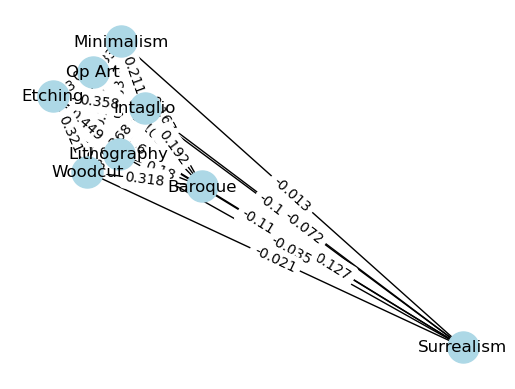

In [25]:
# Create an empty graph
G = nx.Graph()

# Add edges with weights to the graph
for edge in edges:
    node1, node2, weight = edge
    G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)

# Draw edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

# Display the graph interactively
plt.axis('off')
plt.show()

In [26]:
import nxviz as nv


/Users/ludovicaschaerf/anaconda3/envs/art-reco_x86/lib/python3.8/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [27]:
from pyvis.network import Network

In [ ]:
net = Network(notebook=True, height="750px", width="100%",)
for e in edges:
    src = e[0]
    dst = e[1]
    w = e[2]

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst, value=w, title=src + ' to ' + dst + ' similarity ' +str(w))
print(net)

# neighbor_map = net.get_adj_list()

# # add neighbor data to node hover data
# for node in net.nodes:
#     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
#     node["value"] = len(neighbor_map[node["id"]])


# net.toggle_physics(True)
net.show('nx.html')

In [29]:
# seed = random.randint(0,10000)
# original_image_vec = annotations['z_vectors'][seed]
# img = generate_original_image(original_image_vec, model)

In [105]:
# z_0 = original_image_vec + 2 * vectors[0] + 2 * vectors[1]
        

In [30]:
# img = model(z_0.to(), None, truncation_psi=0.7, noise_mode='const')
# img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
        

In [31]:
with dnnlib.util.open_url('./data/model_files/network-snapshot-010600.pkl') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to('cpu') # type: ignore

In [34]:
print(G)

Generator(
  (synthesis): SynthesisNetwork(
    w_dim=512, num_ws=14, img_resolution=256, img_channels=3, num_fp16_res=4
    (b4): SynthesisBlock(
      resolution=4, architecture=skip
      (conv1): SynthesisLayer(
        in_channels=512, out_channels=512, w_dim=512, resolution=4, up=1, activation=lrelu
        (affine): FullyConnectedLayer(in_features=512, out_features=512, activation=linear)
      )
      (torgb): ToRGBLayer(
        in_channels=512, out_channels=3, w_dim=512
        (affine): FullyConnectedLayer(in_features=512, out_features=512, activation=linear)
      )
    )
    (b8): SynthesisBlock(
      resolution=8, architecture=skip
      (conv0): SynthesisLayer(
        in_channels=512, out_channels=512, w_dim=512, resolution=8, up=2, activation=lrelu
        (affine): FullyConnectedLayer(in_features=512, out_features=512, activation=linear)
      )
      (conv1): SynthesisLayer(
        in_channels=512, out_channels=512, w_dim=512, resolution=8, up=1, activation=lrelu
 

In [45]:
print(G.mapping)

512


In [55]:
W = G.mapping(z, None, truncation_psi=0.7)

In [92]:
print(G.mapping(z, None, truncation_psi=1).shape)

torch.Size([1, 14, 512])


In [93]:
print(G.synthesis(W, noise_mode='const').shape)

torch.Size([1, 3, 256, 256])


In [99]:
seed = random.randint(0, 1000000)
W_0 = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to('cpu')
W = W_0.repeat([1, G.num_ws, 1])
img = G.synthesis(W, noise_mode='random')
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
im = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
im.show()

In [101]:
z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to('cpu')
W = G.mapping(z, None, truncation_psi=1)
print(W[0, 0] == W[0, 1])
img = G.synthesis(W, noise_mode='random')
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
im = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
im.show()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [105]:
W[:,0,:,].shape

torch.Size([1, 512])

In [106]:
z.shape

torch.Size([1, 512])

In [107]:
z_vals = []
w_vals = []
fnames = []
# Generate images.
seeds = range(100)
for seed_idx, seed in enumerate(seeds):
    print('Generating image for seed %d (%d/%d) ...' % (seed, seed_idx, len(seeds)))
    z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim))
    z_vals.append(z)
    z = z.to('cpu')
    fnames.append(f'data/images/seed{seed:04d}.png')
    # Construct an inverse rotation/translation matrix and pass to the generator.  The
    # generator expects this matrix as an inverse to avoid potentially failing numerical
    # operations in the network.
    # if hasattr(G.synthesis, 'input'):
    #     m = make_transform(translate, rotate)
    #     m = np.linalg.inv(m)
    #     G.synthesis.input.transform.copy_(torch.from_numpy(m))
    W = G.mapping(z, None, truncation_psi=1)
    w_vals.append(W[:,0,:])
    img = G.synthesis(W, noise_mode='const')

    #img = G(z, None, truncation_psi=0.7, noise_mode='const')
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'data/images/seed{seed:04d}.png')
    
info = {'fname': fnames, 'z_vectors': z_vals, 'w_vectors': w_vals}
with open(f'data/images/seeds{seeds[0]:04d}-{seeds[-1]:04d}.pkl', 'wb') as f:
    pickle.dump(info, f)


Generating image for seed 0 (0/100) ...
Generating image for seed 1 (1/100) ...
Generating image for seed 2 (2/100) ...
Generating image for seed 3 (3/100) ...
Generating image for seed 4 (4/100) ...
Generating image for seed 5 (5/100) ...
Generating image for seed 6 (6/100) ...
Generating image for seed 7 (7/100) ...
Generating image for seed 8 (8/100) ...
Generating image for seed 9 (9/100) ...
Generating image for seed 10 (10/100) ...
Generating image for seed 11 (11/100) ...
Generating image for seed 12 (12/100) ...
Generating image for seed 13 (13/100) ...
Generating image for seed 14 (14/100) ...
Generating image for seed 15 (15/100) ...
Generating image for seed 16 (16/100) ...
Generating image for seed 17 (17/100) ...
Generating image for seed 18 (18/100) ...
Generating image for seed 19 (19/100) ...
Generating image for seed 20 (20/100) ...
Generating image for seed 21 (21/100) ...
Generating image for seed 22 (22/100) ...
Generating image for seed 23 (23/100) ...
Generating i

In [ ]:
# import open_clip
# from open_clip import tokenizer

In [ ]:
# model, _, preprocess = open_clip.create_model_and_transforms('ViT-g-14', pretrained='laion2b_s34b_b88k')
# print(model.eval())
# context_length = model.context_length
# vocab_size = model.vocab_size
